<a href="https://colab.research.google.com/github/Mateo289/TAM/blob/main/Talleres/Deep_Learning_Keras_API_funcional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creación de arquitecturas de aprendizaje profundo mediante API funcional de Keras.

- Se presentan los consideraciones básicas respecto a la [API funcional de Keras](https://keras.io/guides/functional_api/) para la implementación de modelos de redes profundas con TensorFlow.



In [ ]:
import tensorflow as tf #importar tensorflow
print(tf.__version__)

2.18.0


- Se utilizará la base de datos Fashion Mnist nuevamente, normalizando las imágenes de 0 a 1.

Carga el conjunto de datos Fashion MNIST. Este conjunto incluye 70,000 imágenes en escala de grises de diferentes prendas de vestir (60,000 para entrenamiento y 10,000 para pruebas), junto con sus etiquetas correspondientes.

In [ ]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


- Se presenta un ejemplo de la base de datos

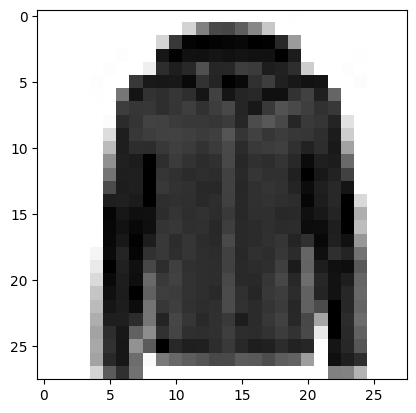

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[5000,:,:],cmap= 'binary')
plt.show()

In [ ]:
import numpy as np
print(np.unique(labels)) #etiquetas
print(images.shape) #tamaño de las imágenes

[0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28)


In [ ]:
Xtrain, ytrain = train
Xtrain = Xtrain/255 # tipo flotante, normalizados de 0 a 1
Xtest, ytest = test
Xtest = Xtest/255 # tipo flotante, normalizados de 0 a 1

- En el cuaderno introductorio a redes neuronales con tensorflow se planteó la construcción de modelos mediante secuencia de capas:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ red1 (Dense)                    │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hred2 (Dense)                   │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,560 (654.53 KB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 0 (0.00 B)

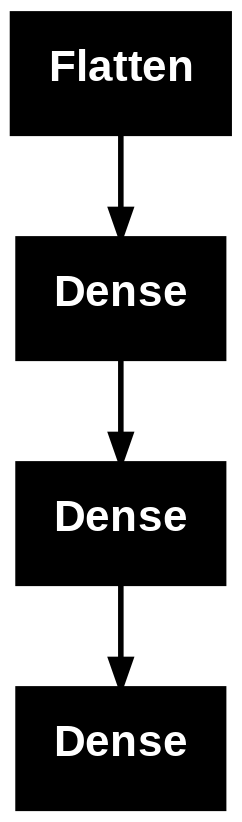

In [ ]:
#definir arquitectura secuencial
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2])),
    tf.keras.layers.Dense(200,activation="relu", name='red1'),
    tf.keras.layers.Dense(50, activation="tanh",name='hred2'),
    tf.keras.layers.Dense(10,activation='softmax',name='output')
])

model.summary() # resumen del modelo
tf.keras.utils.plot_model(model) #diagrama del modelo

- Aunque la implementacióm mediante secuencia es intuitiva, no permite realizar conexiones flexibles entre capas.

- En ese sentido, Keras permite crear capas bajo el principio de funciones y argumentos, como se muestra a continuación.

**Nota**: a diferencia de la estructura secuencial, en la API funcional se debe indicar la capa o capas de entrada y la capa o capas de salida para crear el grafo computacional de forma apropiada.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ entrada             │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ entrada2            │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 784)       │          0 │ entrada[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 784)       │          0 │ entrada2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 1568)      │          0 │ flatten_1[0][0],  │
│ (Concatenate)       │                   │            │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ h1 (Dense)          │ (None, 200)       │    313,800 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ h2 (Dense)          │ (None, 50)        │     10,050 │ h1[0][0]          │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 10)        │        510 │ h2[0][0]          │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 324,360 (1.24 MB)

 Trainable params: 324,360 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

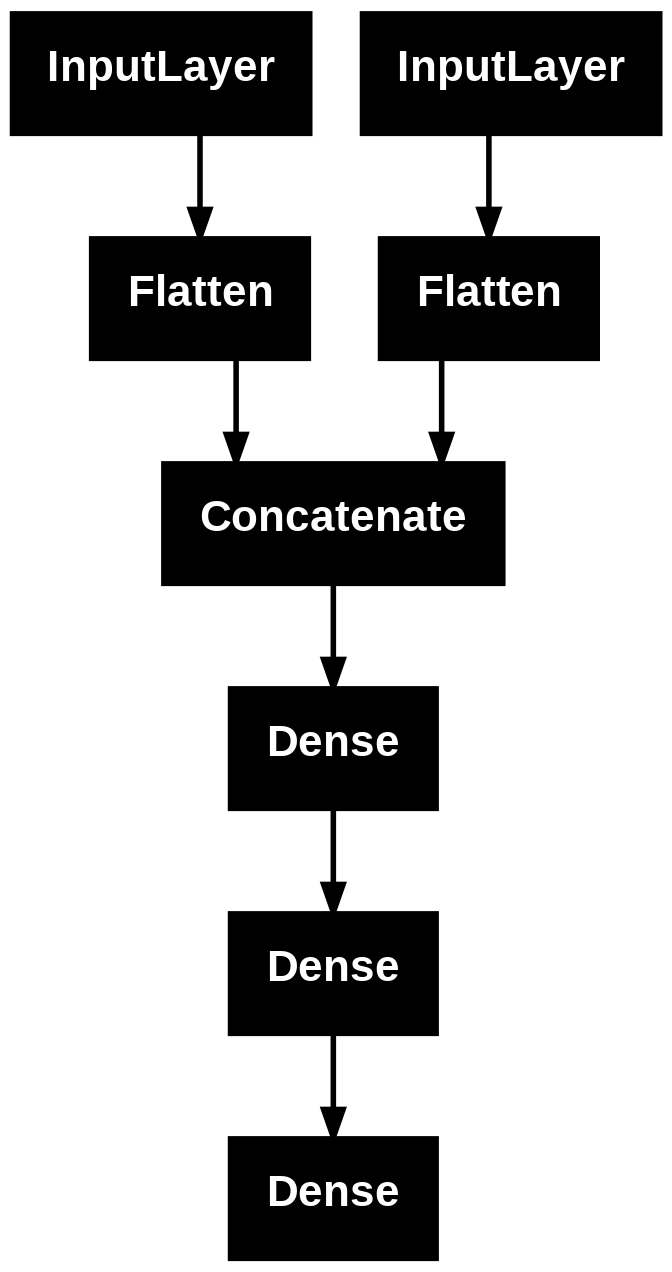

In [ ]:
#arquitectura funcional
#capa de entrada
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
input_2 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada2')

#capa de aplanamiento de las imágenes - Apply Flatten to each input separately
flatten_l = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)
flatten_2 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_2)

# Now you can decide how to combine the flattened outputs.
# For example, if you wanted to concatenate them:
combined_flattened = tf.keras.layers.concatenate([flatten_l, flatten_2])

# Since the next layers (h1 and h2) are applied to a single tensor named 'flatten',
# it seems the intention might have been to just use one input for this specific model,
# or there's a misunderstanding of how to handle multiple inputs with Flatten.
# Assuming for this specific model, only input_l should be processed by the first Dense layer 'h1':

#capas densas
h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(combined_flattened)#argumento de entrada
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa de salida
output = tf.keras.layers.Dense(10,activation="softmax",name='output')(h2)

##CREAR MODELO SEGUN CONEXIONES TIPO FUNCIONALES : ///////// !!!!!!!!!!!!!!!!!!!!
# The model should be created with the actual inputs used in the graph.
# If input_2 was intended but not used after flatten, the model should only have input_l as input.
# If input_2 was meant to be processed separately or combined later, the model definition needs to reflect that.
# Based on the original code structure where h1 takes 'flatten' as input, and 'flatten' was derived from input_l and input_2 (incorrectly),
# I'll assume the first Dense layer should take the flattened output of input_l.
model_fun = tf.keras.Model(inputs=input_l, outputs=output)

#resumen y gráfica del modelo
model_fun.summary()
tf.keras.utils.plot_model(model_fun)

# La API funcional permite realizar conexiones más flexibles

- En el siguiente ejemplo se crea un modelo con una entrada y dos salidas con interconexiones flexibles:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


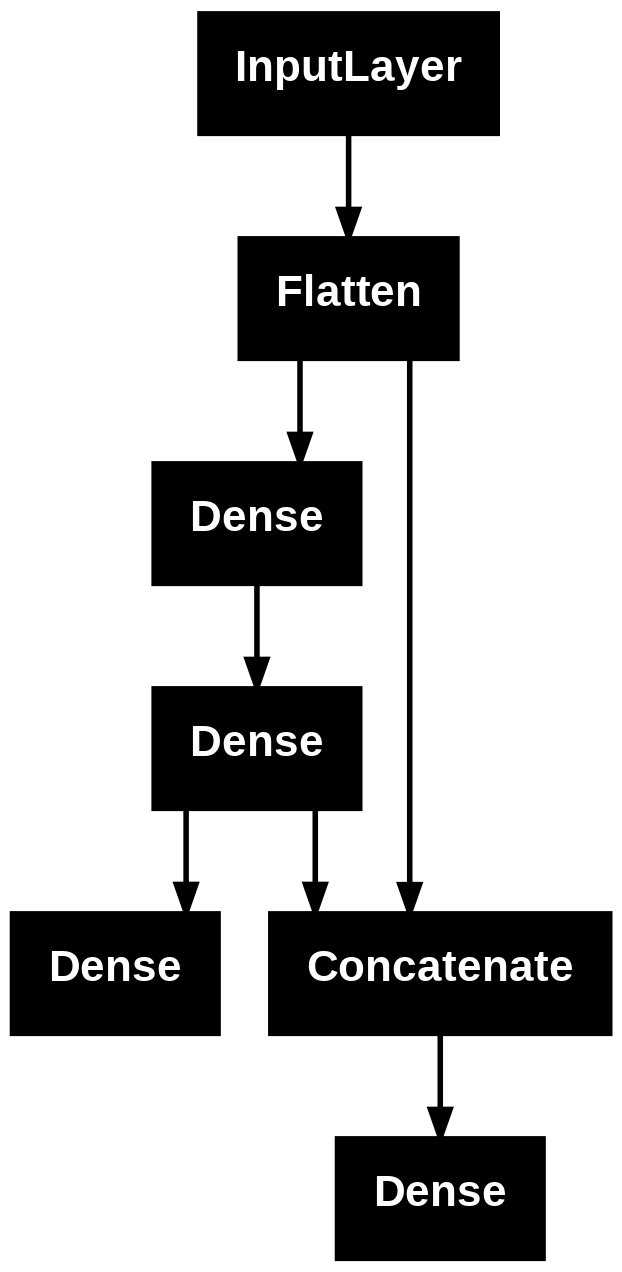

In [ ]:
#arquitectura funcional 2
tf.keras.backend.clear_session()
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)

h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2,flatten])
#se crean dos salidas:
output_A = tf.keras.layers.Dense(10,activation="softmax",name='outputA')(concat)#desde concatenación
output_B = tf.keras.layers.Dense(10,activation="softmax",name='outputB')(h2)#desde h2
#las entradas y salidas se ingresan como listas
model_fun = tf.keras.Model(inputs=input_l,outputs=[output_A, output_B])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun)

**Nota**: si se cuenta con varias salidas se puede definir un mismo costo para cada salida, o una lista con los costos requeridos. Además, en la lista `loss_weights` se puede especificar el valor del peso asociado al costo de cada salida en el intervalo [0,1].

In [ ]:
model_fun.compile(loss="sparse_categorical_crossentropy", #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy","accuracy"]) #f1, precision, recall, crossentropy


- El entrenamiento se realiza de igual forma al utilizado con el modelo secuencial.

- Como se fijaron dos salidas, se debe ingresar una lista para los argumentos ytrain.

In [ ]:
history = model_fun.fit(Xtrain, [ytrain,ytrain] , epochs=10,batch_size=64, # 32, 64, 128, 256
                    validation_split=0.3) # se fija el conjunto de validación como el 20% del de train

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 1.5467 - outputA_accuracy: 0.7069 - outputA_loss: 0.8405 - outputB_accuracy: 0.7591 - outputB_loss: 0.7062 - val_loss: 0.8468 - val_outputA_accuracy: 0.8488 - val_outputA_loss: 0.4286 - val_outputB_accuracy: 0.8495 - val_outputB_loss: 0.4172
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.8148 - outputA_accuracy: 0.8516 - outputA_loss: 0.4127 - outputB_accuracy: 0.8536 - outputB_loss: 0.4021 - val_loss: 0.7869 - val_outputA_accuracy: 0.8554 - val_outputA_loss: 0.3952 - val_outputB_accuracy: 0.8563 - val_outputB_loss: 0.3906
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.7221 - outputA_accuracy: 0.8667 - outputA_loss: 0.3652 - outputB_accuracy: 0.8680 - outputB_loss: 0.3569 - val_loss: 0.7315 - val_outputA_accuracy: 0.8697 - val_outputA_loss: 0.3649 - val_outputB_accuracy: 0.8677 - val_outputB_loss: 0.3658
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.6693 - outputA_accuracy: 0.8783

- Se presentan las curvas de desempeño:

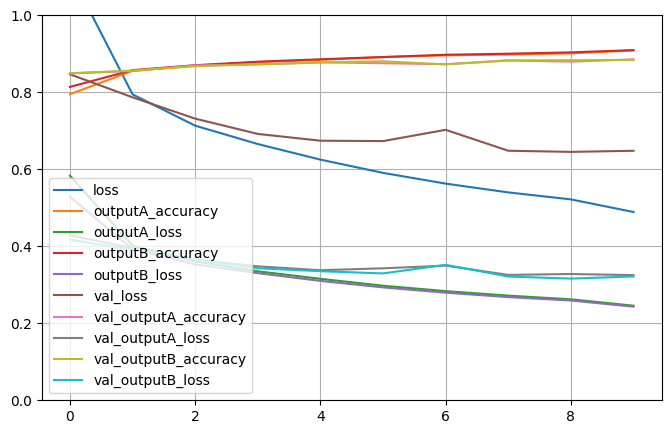

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

- Como el modelo generado presenta dos salidas, el rendimiento se discrimina por cada salida y el acumulado.

- A la hora de predecir la salida para una nueva muestra, se debe tener en cuenta la cantidad de salidas fijadas.

In [ ]:
yestA,yestB = model_fun.predict(Xtest)
print(yestA.shape,yestB.shape)#salidas tipo 1 -K probabilidad de membresia a cada clase

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10) (10000, 10)


In [ ]:
print(yestA[0].argmax(),ytest[0])#para estimar la etiqueta ordinal se encuentra el max por columnas

9 9


In [ ]:
scoreA = model_fun.evaluate(Xtest,[ytest,ytest])#evaluacion
print(scoreA)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6920 - outputA_accuracy: 0.8736 - outputA_loss: 0.3477 - outputB_accuracy: 0.8733 - outputB_loss: 0.3443
[0.6955751180648804, 0.35101422667503357, 0.34413793683052063, 0.8741999864578247, 0.8737000226974487]


# Grafiquemos los pesos respecto a las dimensiones de la imagen original

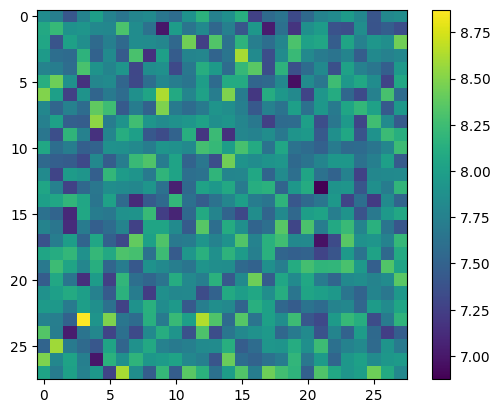

In [ ]:
#se busca identificar las entradas más relevantes para la red
plt.imshow(abs(model.layers[1].get_weights()[0]).sum(axis=1).reshape(28,28))
plt.colorbar()
plt.show()

In [ ]:
model.layers[1].get_weights()[1].shape # accediendo a los bias

(200,)

# Ejercicio 1:

- Grafique el espacio proyectado de PCA en 2D (etiquetas e imágenes) para los atributos aprendidos por la capa de concatenación.


# Salidas parciales de la red

- La estrategia funcional nos permite acceder a partes intermedias de la red para encontrar mapas de características y verificar el aprendizaje de la representación.

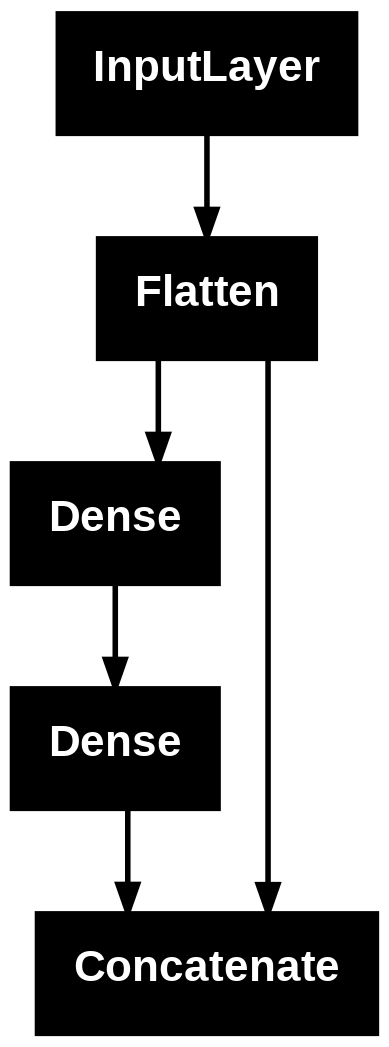

In [ ]:
#crear nuevo modelo con salida parcial
model_C = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('concatenate').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_C) # modelo ya esta ajustado!

In [ ]:
z = model_C.predict(Xtest) # salida en concatenate
z.shape

 41/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(32, 28, 28))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)


(10000, 834)

### Dado que se fijaron 50 unidades, se pueden utilizar técnicas de reducción de dimensión para visualizar los patrones intermedios de la red en 2D.


# Principal Component Analysis (PCA)

Reducción de dimensión lineal basado en la preservación de la varianza

![PCA1](https://www.soloentendidos.com/wp-content/uploads/2021/06/Principal-Component-Analysis-second-principal_thumb-1.gif)


![PCA2](https://1.bp.blogspot.com/-pgMAHiIWvuw/Tql5HIXNdRI/AAAAAAAABLI/I2zPF5cLRwQ/s1600/clust.gif)


# t-student distributed Stochastic Neighbor Embedding (t-SNE)

Reducción de dimensión basado en la preservación de localidades (vecinos) utilizando medidas de información desde estimación no paramétrica de probabilidad en el espación de alta y baja dimensión, respectivamente.

![tsne](https://learnopencv.com/wp-content/uploads/2022/11/tsne.gif)

![tsne2](https://3.bp.blogspot.com/-NE01azL_JxU/Wxli17oYNzI/AAAAAAAACxQ/axOI2yy-Ft0QbqaekOyemm5Xn0wAFvRUwCLcBGAs/s640/image2.gif)

In [ ]:
from sklearn.decomposition import PCA
zpca = PCA(n_components=2).fit_transform(z)
zpca.shape

(10000, 2)

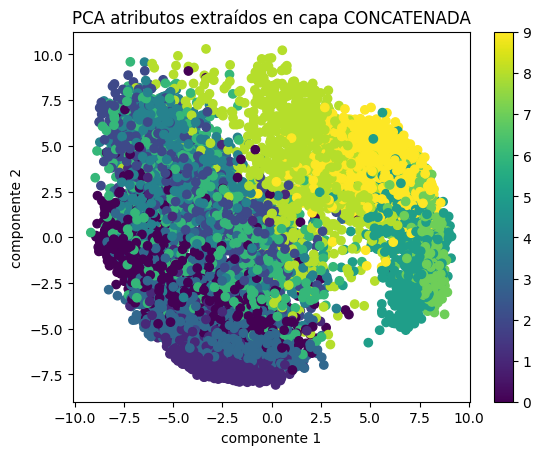

In [ ]:
plt.scatter(zpca[:,0],zpca[:,1],c=ytest)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa CONCATENADA')
plt.show()

In [ ]:
#plot mnist 2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def plot_mnist_2d(Z,y,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(16,10))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

- También, podemos revisar la distribución de las imágenes en el espacio proyectado:

Text(0.5, 1.0, 'PCA atributos extraídos en capa concatenada')

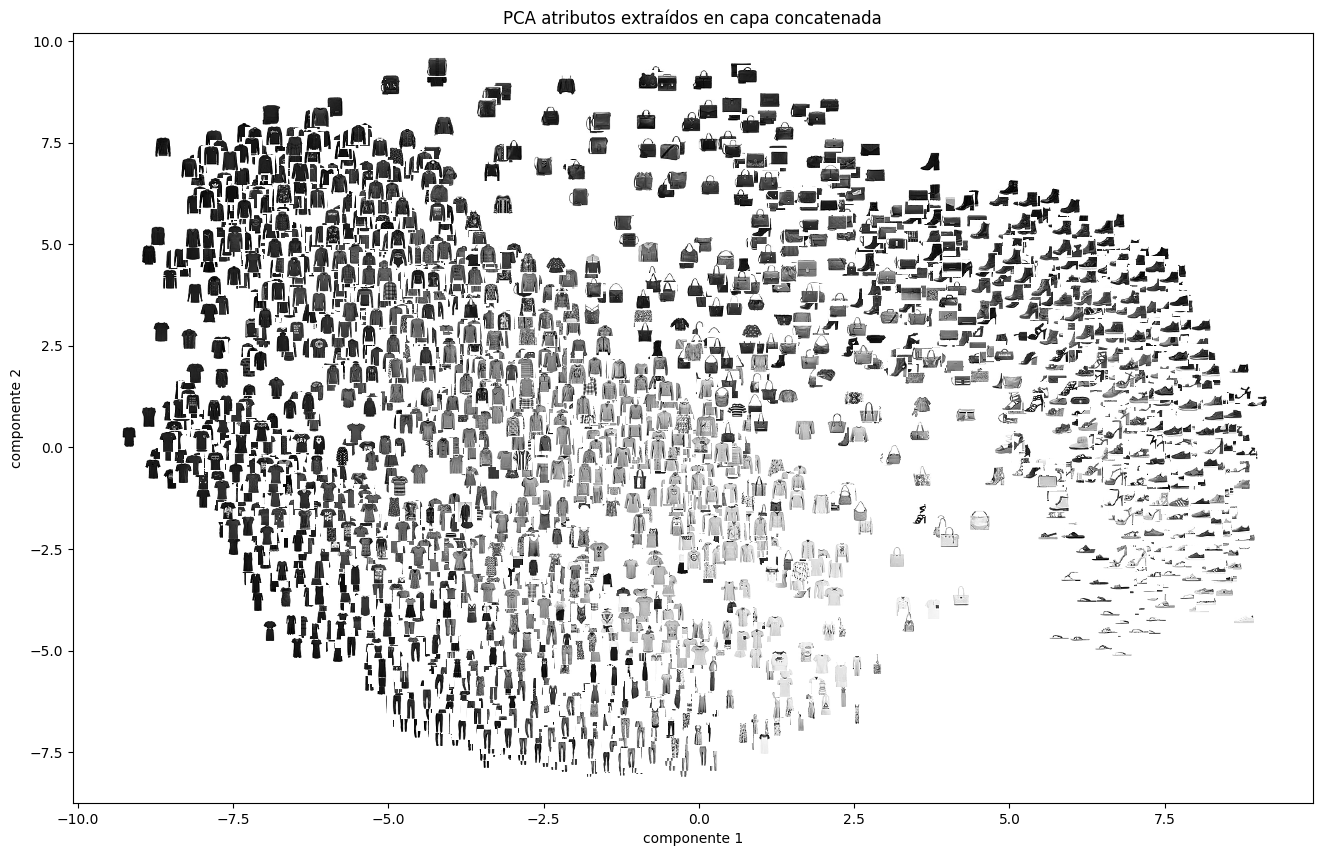

In [ ]:
Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa concatenada')

# Ejercicio 2:
- Repita el proceso aplicando la técnica de reducción de dimensión [UMAP de RAPIDS](https://developer.nvidia.com/blog/even-faster-and-more-scalable-umap-on-the-gpu-with-rapids-cuml/).



In [ ]:
# Instala umap-learn (es un requisito para cuML.UMAP, aunque cuML usa su propia implementación en GPU)
!pip install umap-learn

In [ ]:
# Importaciones de RAPIDS cuML
# Si alguna de estas importaciones falla, el código se detendrá con un ImportError.
import cuml
from cuml.decomposition import PCA as cuPCA
#from cuml.decomposition import KernelPCA as cuKernelPCA
from cuml.manifold import TSNE as cuTSNE
from cuml.manifold import UMAP as cuUMAP
from cuml.cluster import KMeans as cuKMeans
import cudf # Necesario para manejar datos en la GPU para cuML
import time
from sklearn.metrics import silhouette_score

In [ ]:
zumap = cuUMAP(n_components=2, random_state=42).fit_transform(z)
zumap.shape # This line seems to be unrelated to the UMAP calculation and can be removed or moved


[2025-06-14 04:06:29.530] [CUML] [info] build_algo set to brute_force_knn because random_state is given


(10000, 2)

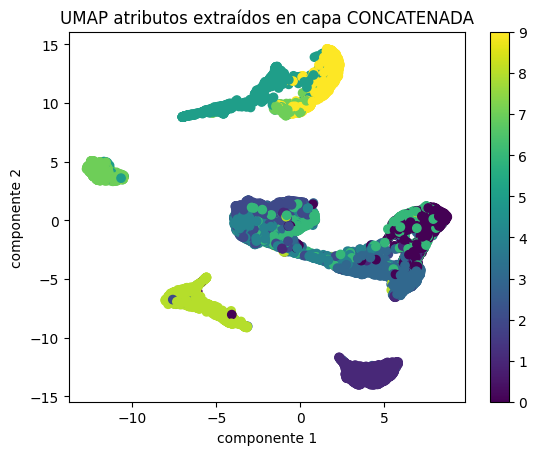

In [ ]:
plt.scatter(zumap[:,0],zumap[:,1],c=ytest)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('UMAP atributos extraídos en capa CONCATENADA')
plt.show()

Text(0.5, 1.0, 'UMAP atributos extraídos en capa concatenada')

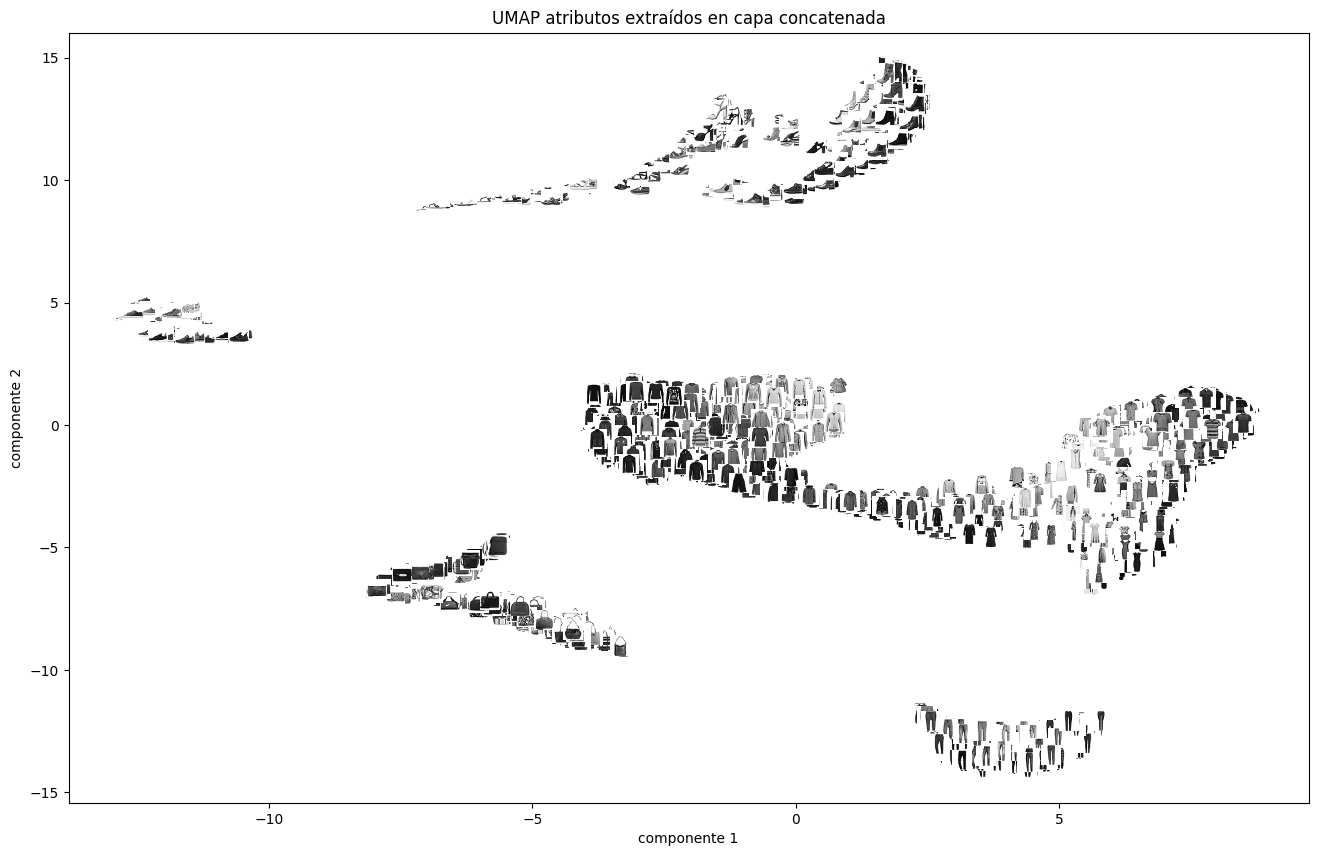

In [ ]:
Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zumap[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('UMAP atributos extraídos en capa concatenada')

# Ejercicio 3
- Plantee una nueva arquitectura tipo funcional utilizando capas convolucionales (Ver cuaderno [CNNs](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/3_Introduccion_CNN.ipynb)) para el entrenamiento de la base de datos Mnist-digitos, utilizando tres entradas: i) imágenes limpias, ii) y iii) imágenes con ruido blanco Gaussiano ante diferentes varianzas, y dos salidas i) estimación del digito, ii) estimación número par número impar.

In [ ]:
#Entrenar y ajustar el modelo, revisar rendimientos en cada salida

La arquitectura propuesta se basa en un extractor de características convolucional compartido para procesar cada una de las tres entradas. Este enfoque es eficiente, ya que permite que el modelo aprenda a identificar características relevantes (bordes, curvas, etc.) de las imágenes, independientemente del nivel de ruido, utilizando el mismo conjunto de pesos. Luego, las características extraídas de cada entrada se combinan para realizar las dos predicciones finales.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# -- 1. Carga y Preparación de Datos (código de ayuda adaptado) --

# Cargar el dataset MNIST
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Crear conjuntos de validación y un conjunto de entrenamiento más pequeño
X_train, X_valid = X_train_full[:55000], X_train_full[55000:]
y_train, y_valid = y_train_full[:55000], y_train_full[55000:]

# Añadir dimensión de canal y normalizar las imágenes a [0, 1]
X_train = X_train[..., np.newaxis] / 255.
X_valid = X_valid[..., np.newaxis] / 255.
X_test = X_test[..., np.newaxis] / 255.

print("Forma de los datos de entrenamiento:", X_train.shape)
print("Forma de los datos de validación:", X_valid.shape)
print("Forma de los datos de prueba:", X_test.shape)

Forma de los datos de entrenamiento: (55000, 28, 28, 1)
Forma de los datos de validación: (5000, 28, 28, 1)
Forma de los datos de prueba: (10000, 28, 28, 1)


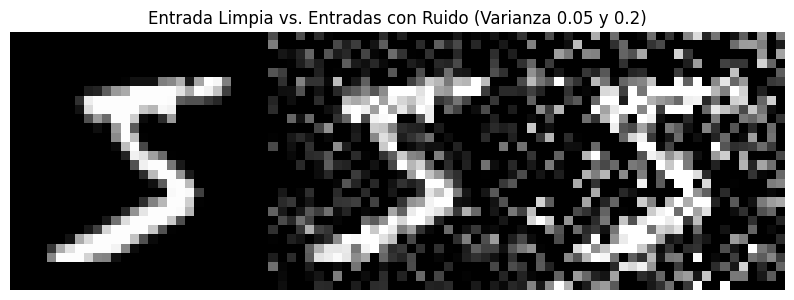

In [ ]:
# -- 2. Creación de Entradas con Ruido Gaussiano --

var_ = [0.05, 0.2] # Varianzas del ruido
inputs_train = [X_train]
inputs_valid = [X_valid]
inputs_test = [X_test]

# Generar imágenes con ruido para entrenamiento, validación y prueba
for var_i in var_:
    # Ruido para el conjunto de entrenamiento
    noise_train = np.sqrt(var_i) * np.random.randn(*X_train.shape)
    X_train_noisy = X_train + noise_train
    X_train_noisy = np.clip(X_train_noisy, 0., 1.) # Recortar valores para mantener el rango [0,1]
    inputs_train.append(X_train_noisy)

    # Ruido para el conjunto de validación
    noise_valid = np.sqrt(var_i) * np.random.randn(*X_valid.shape)
    X_valid_noisy = X_valid + noise_valid
    X_valid_noisy = np.clip(X_valid_noisy, 0., 1.)
    inputs_valid.append(X_valid_noisy)

    # Ruido para el conjunto de prueba
    noise_test = np.sqrt(var_i) * np.random.randn(*X_test.shape)
    X_test_noisy = X_test + noise_test
    X_test_noisy = np.clip(X_test_noisy, 0., 1.)
    inputs_test.append(X_test_noisy)

# Visualizar una muestra de las 3 entradas
plt.figure(figsize=(10, 5))
plt.imshow(np.c_[inputs_train[0][0,:,:,0], inputs_train[1][0,:,:,0], inputs_train[2][0,:,:,0]], cmap='gray')
plt.title("Entrada Limpia vs. Entradas con Ruido (Varianza 0.05 y 0.2)")
plt.axis('off')
plt.show()

In [ ]:
# -- 3. Preparación de las Etiquetas de Salida --

# Salida 1: Dígito original (ya está en y_train, y_valid, y_test)

# Salida 2: Par o impar (0 para par, 1 para impar)
y_train_parity = (y_train % 2).astype(np.float32)
y_valid_parity = (y_valid % 2).astype(np.float32)
y_test_parity = (y_test % 2).astype(np.float32)

Entradas Múltiples: El modelo se define con tres capas de entrada (input_clean, input_noisy_1, input_noisy_2) utilizando la API funcional de Keras. Cada una está diseñada para recibir una imagen de 28×28×1

En lugar de crear tres bloques de convolución idénticos pero con pesos separados, definimos un único bloque Sequential que actúa como un extractor de características.
Este bloque consiste en dos capas Conv2D con activación ReLU, cada una seguida de una capa MaxPooling2D para reducir la dimensionalidad espacial y hacer la representación más robusta.
La última capa es Flatten, que convierte los mapas de características 2D en un vector 1D.

In [ ]:
# -- 4. Definición de la Arquitectura Convolucional Funcional --

tf.keras.backend.clear_session()

# Definir las tres capas de entrada
input_shape = (28, 28, 1)
input_clean = tf.keras.layers.Input(shape=input_shape, name='input_clean')
input_noisy_1 = tf.keras.layers.Input(shape=input_shape, name='input_noisy_1')
input_noisy_2 = tf.keras.layers.Input(shape=input_shape, name='input_noisy_2')

# Definir el bloque convolucional compartido
# Este bloque se aplicará a cada una de las tres entradas
cnn_block = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten()
], name='shared_cnn_block')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Ventaja clave: Al aplicar este mismo bloque (cnn_block) a las tres entradas, el modelo aprende un único conjunto de filtros para identificar patrones en las imágenes. Esto reduce drásticamente el número de parámetros, acelera el entrenamiento y mejora la generalización, ya que aprende a extraer características útiles tanto de imágenes limpias como ruidosas con los mismos "ojos".

In [ ]:
# Aplicar el bloque CNN a cada entrada
features_clean = cnn_block(input_clean)
features_noisy_1 = cnn_block(input_noisy_1)
features_noisy_2 = cnn_block(input_noisy_2)

Capa de Concatenación:

La capa concatenate toma los tres vectores de características aplanados (uno por cada entrada) y los une en un único vector largo.
Este vector combinado contiene la información aprendida de la imagen limpia y de las dos versiones con ruido.

In [ ]:
# Concatenar las características extraídas de las tres ramas
concatenated_features = tf.keras.layers.concatenate(
    [features_clean, features_noisy_1, features_noisy_2],
    name='concatenate_features'
)

Capa de Fusión y Regularización:

Una capa Dense (fusion_layer) con activación ReLU procesa el vector concatenado, permitiendo al modelo aprender relaciones complejas entre las características de las diferentes entradas.
Se añade una capa de Dropout con una tasa de 0.5 para regularizar el modelo y prevenir el sobreajuste, una práctica común antes de las capas de salida.

In [ ]:
# Capa densa de fusión para aprender de las características combinadas
fusion_layer = tf.keras.layers.Dense(128, activation='relu', name='fusion_dense')(concatenated_features)
dropout_layer = tf.keras.layers.Dropout(0.5)(fusion_layer)

output_digit: Una capa Dense con 10 neuronas y activación softmax. Es la responsable de la clasificación multiclase para estimar a qué dígito (0-9) corresponde la imagen.
output_parity: Una capa Dense con 1 neurona y activación sigmoid. Se encarga de la clasificación binaria para determinar si el dígito es par (cercano a 0) o impar (cercano a 1).

Model: "multi_input_cnn_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_clean         │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_noisy_1       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_noisy_2       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shared_cnn_block    │ (None, 3136)      │     18,816 │ input_clean[0][0… │
│ (Sequential)        │                   │            │ input_noisy_1[0]… │
│                     │                   │            │ input_noisy_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_featur… │ (None, 9408)      │          0 │ shared_cnn_block… │
│ (Concatenate)       │                   │            │ shared_cnn_block… │
│                     │                   │            │ shared_cnn_block… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fusion_dense        │ (None, 128)       │  1,204,352 │ concatenate_feat… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ fusion_dense[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_digit        │ (None, 10)        │      1,290 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_parity       │ (None, 1)         │        129 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,224,587 (4.67 MB)

 Trainable params: 1,224,587 (4.67 MB)

 Non-trainable params: 0 (0.00 B)

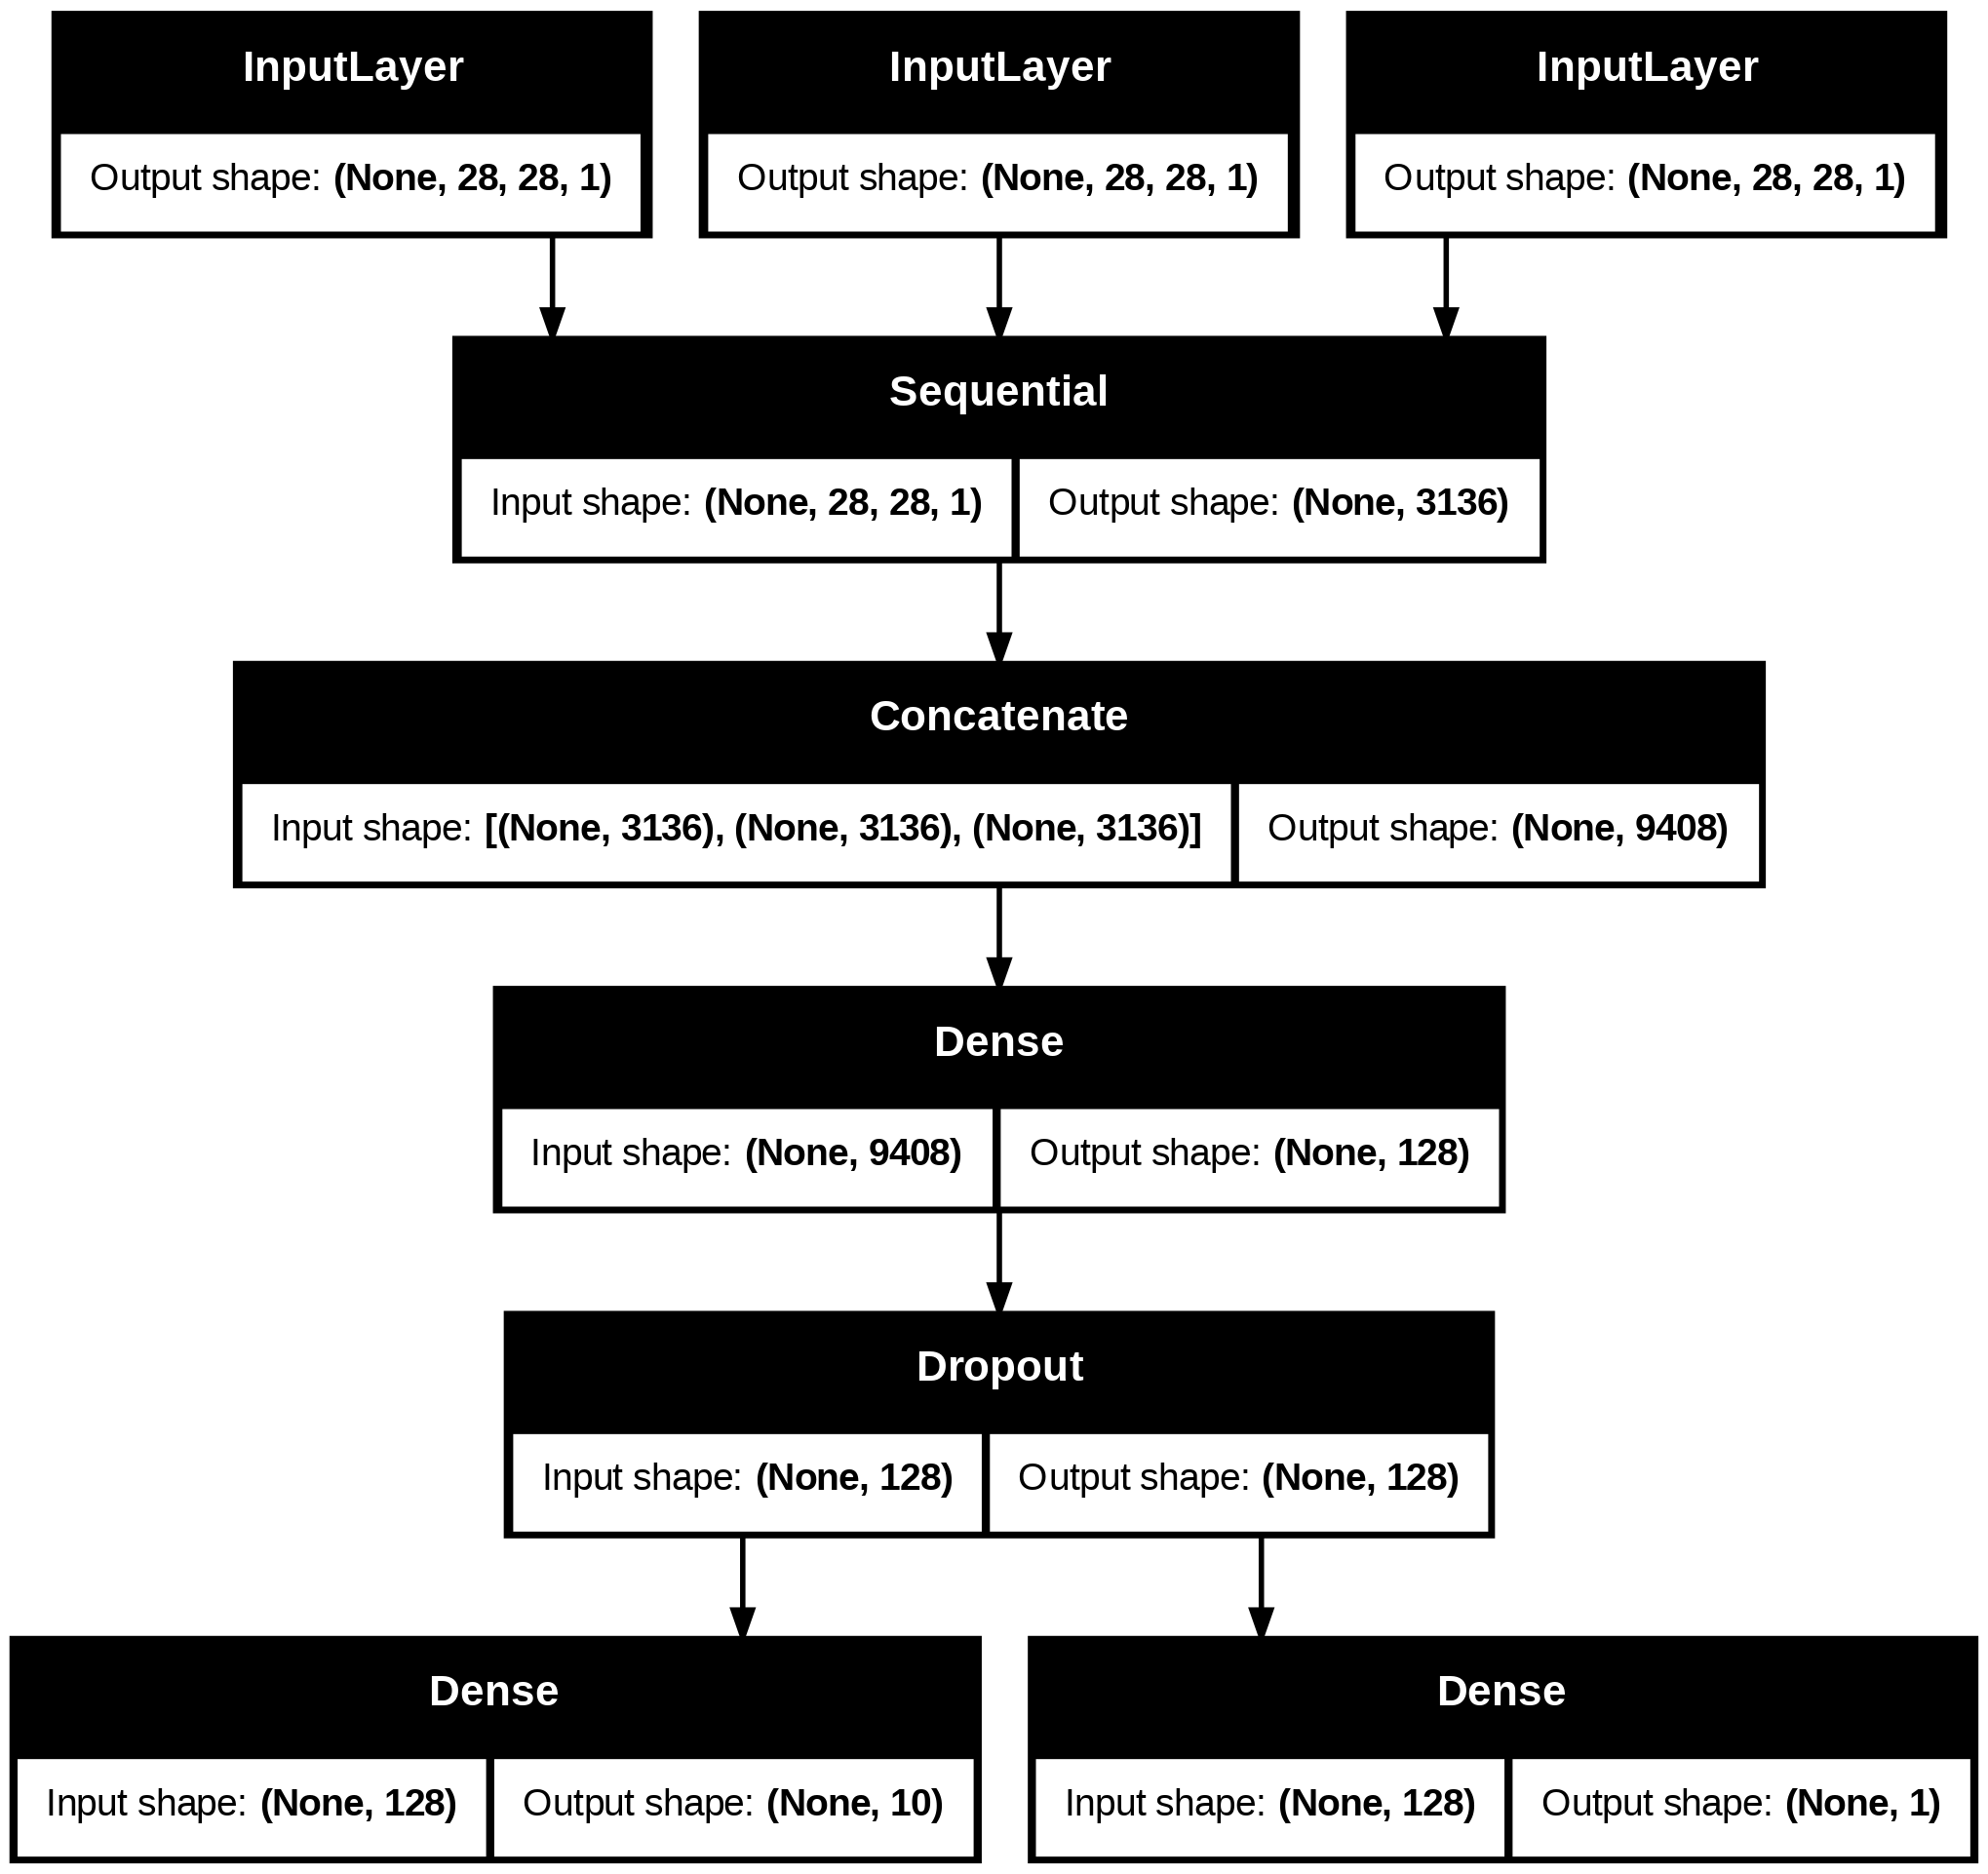

In [ ]:
# Definir las dos cabezas de salida
# Salida 1: Clasificación del dígito (0-9)
output_digit = tf.keras.layers.Dense(10, activation='softmax', name='output_digit')(dropout_layer)

# Salida 2: Clasificación de paridad (par/impar)
output_parity = tf.keras.layers.Dense(1, activation='sigmoid', name='output_parity')(dropout_layer)

# Crear el modelo funcional
model = tf.keras.Model(
    inputs=[input_clean, input_noisy_1, input_noisy_2],
    outputs=[output_digit, output_parity],
    name='multi_input_cnn_model'
)

# Imprimir el resumen del modelo
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

Compilación y Entrenamiento:

El modelo se compila especificando una función de pérdida y métricas para cada salida nombrada. Usamos sparse_categorical_crossentropy para la clasificación de dígitos (ya que las etiquetas son enteros) y binary_crossentropy para la clasificación de paridad.
Durante el entrenamiento con model.fit(), las entradas se pasan como una lista de arrays y las salidas como un diccionario que mapea los nombres de las capas de salida a sus respectivas etiquetas.

In [ ]:
# -- 5. Compilación del Modelo --

# Para un modelo con múltiples salidas, podemos especificar diferentes funciones de pérdida y métricas para cada una
model.compile(
    loss={
        'output_digit': 'sparse_categorical_crossentropy', # Para etiquetas enteras (0-9)
        'output_parity': 'binary_crossentropy' # Para clasificación binaria (0/1)
    },
    optimizer='adam',
    metrics={
        'output_digit': 'accuracy',
        'output_parity': 'accuracy'
    }
)

In [ ]:
# -- 6. Entrenamiento del Modelo --

history = model.fit(
    x=inputs_train, # Lista de las 3 matrices de entrada
    y={'output_digit': y_train, 'output_parity': y_train_parity}, # Diccionario de salidas
    epochs=10,
    batch_size=64,
    validation_data=(
        inputs_valid, # Lista de entradas de validación
        {'output_digit': y_valid, 'output_parity': y_valid_parity} # Diccionario de salidas de validación
    )
)

Epoch 1/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - loss: 0.8242 - output_digit_accuracy: 0.8058 - output_digit_loss: 0.5993 - output_parity_accuracy: 0.8969 - output_parity_loss: 0.2249 - val_loss: 0.1078 - val_output_digit_accuracy: 0.9824 - val_output_digit_loss: 0.0631 - val_output_parity_accuracy: 0.9858 - val_output_parity_loss: 0.0435
Epoch 2/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1712 - output_digit_accuracy: 0.9658 - output_digit_loss: 0.1173 - output_parity_accuracy: 0.9819 - output_parity_loss: 0.0540 - val_loss: 0.0729 - val_output_digit_accuracy: 0.9860 - val_output_digit_loss: 0.0445 - val_output_parity_accuracy: 0.9900 - val_output_parity_loss: 0.0276
Epoch 3/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1356 - output_digit_accuracy: 0.9726 - output_digit_loss: 0.0951 - output_parity_accuracy: 0.9861 - output_parity_loss: 0.0405 - val_loss: 0.0720 - val_output_digit_accuracy: 0.9886 - val_output_digit_loss: 0.0439 - val_output_parity_accuracy:

In [ ]:
# -- 7. Evaluación del Modelo --

print("\nEvaluando el modelo con los datos de prueba...")
results = model.evaluate(
    x=inputs_test,
    y={'output_digit': y_test, 'output_parity': y_test_parity}
)

print("\nResultados de la evaluación:")
print(f"Pérdida Total: {results[0]:.4f}")
print(f"Pérdida de Dígitos: {results[1]:.4f}")
print(f"Pérdida de Paridad: {results[2]:.4f}")
print(f"Precisión de Dígitos: {results[3]:.4f}")
print(f"Precisión de Paridad: {results[4]:.4f}")


Evaluando el modelo con los datos de prueba...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0709 - output_digit_accuracy: 0.9863 - output_digit_loss: 0.0490 - output_parity_accuracy: 0.9942 - output_parity_loss: 0.0219

Resultados de la evaluación:
Pérdida Total: 0.0593
Pérdida de Dígitos: 0.0415
Pérdida de Paridad: 0.0176
Precisión de Dígitos: 0.9886
Precisión de Paridad: 0.9950


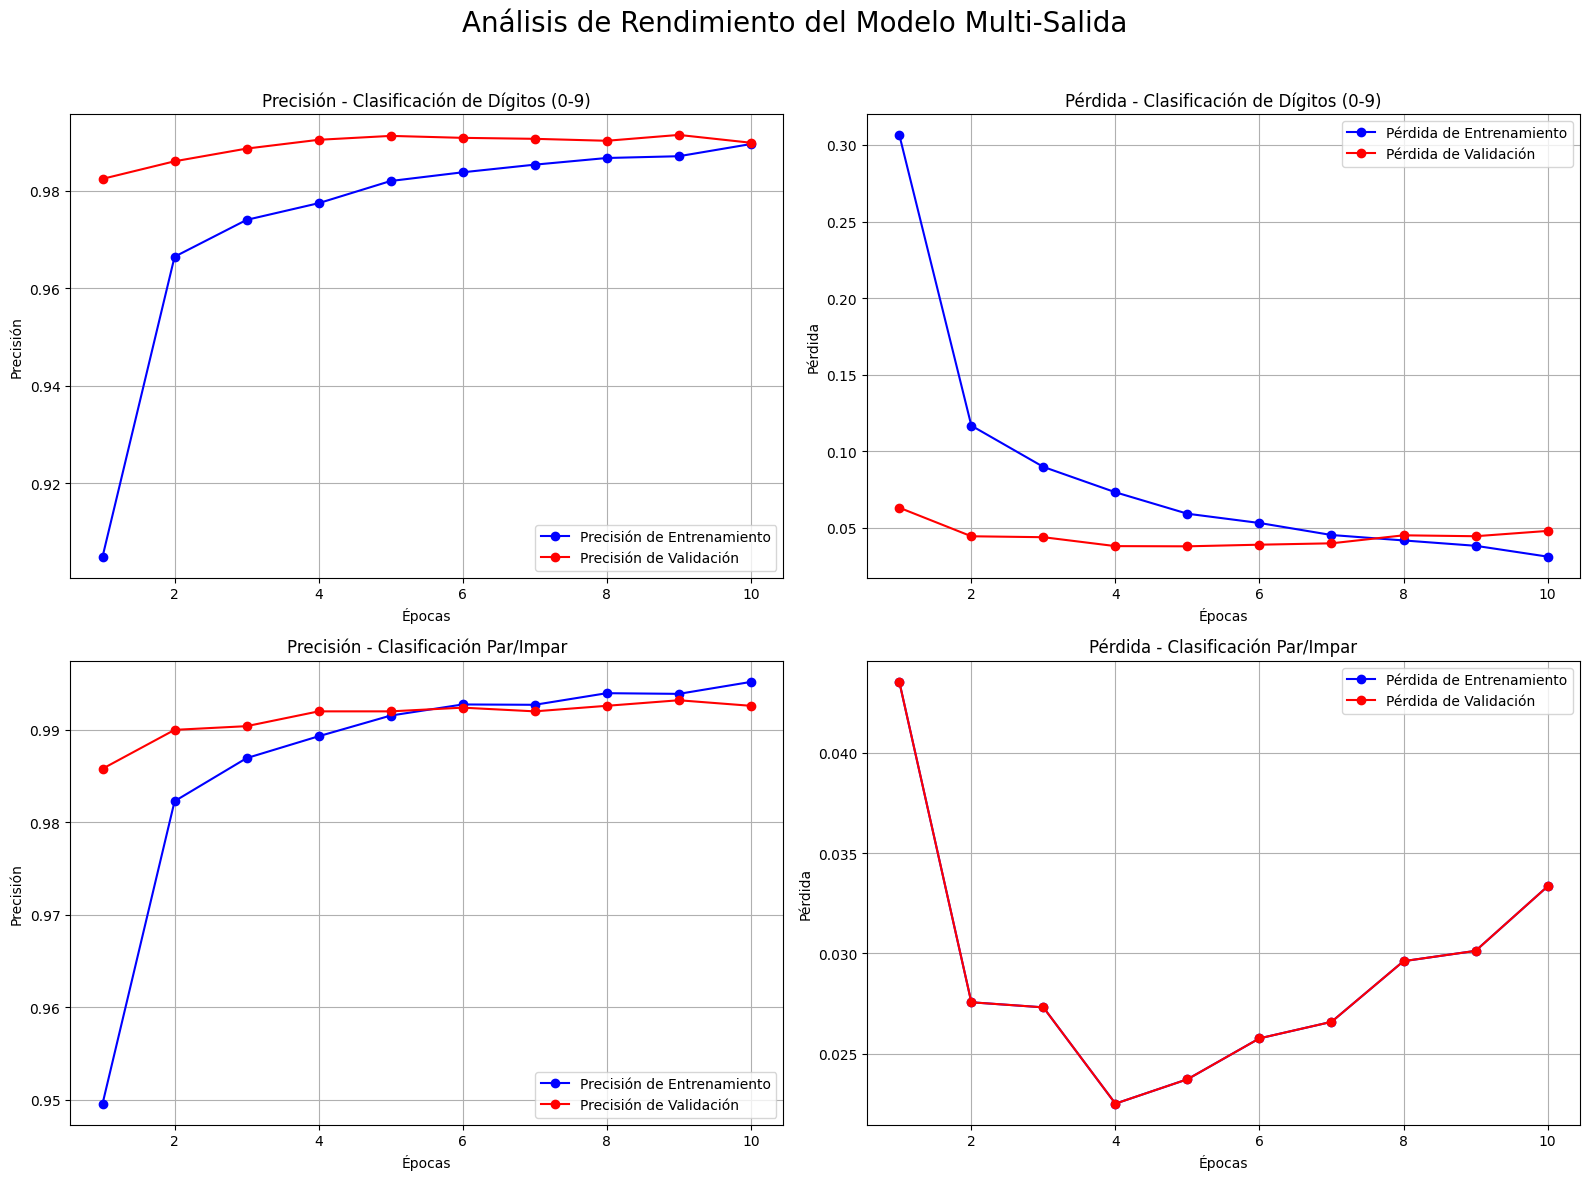

In [ ]:
# -- 1. Extraer los datos del objeto history --
history_dict = history.history

# Métricas para la salida de dígitos
acc_digit = history_dict['output_digit_accuracy']
val_acc_digit = history_dict['val_output_digit_accuracy']
loss_digit = history_dict['output_digit_loss']
val_loss_digit = history_dict['val_output_digit_loss']

# Métricas para la salida de paridad
acc_parity = history_dict['output_parity_accuracy']
val_acc_parity = history_dict['val_output_parity_accuracy']
loss_parity = history_dict['val_output_parity_loss']
val_loss_parity = history_dict['val_output_parity_loss']

# Número de épocas
epochs = range(1, len(acc_digit) + 1)

# -- 2. Crear los gráficos --

# Crear una figura con 2x2 subplots para organizar los gráficos
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis de Rendimiento del Modelo Multi-Salida', fontsize=20)

# Gráfico 1: Precisión en la Clasificación de Dígitos
axs[0, 0].plot(epochs, acc_digit, 'bo-', label='Precisión de Entrenamiento')
axs[0, 0].plot(epochs, val_acc_digit, 'ro-', label='Precisión de Validación')
axs[0, 0].set_title('Precisión - Clasificación de Dígitos (0-9)')
axs[0, 0].set_xlabel('Épocas')
axs[0, 0].set_ylabel('Precisión')
axs[0, 0].grid(True)
axs[0, 0].legend()

# Gráfico 2: Pérdida en la Clasificación de Dígitos
axs[0, 1].plot(epochs, loss_digit, 'bo-', label='Pérdida de Entrenamiento')
axs[0, 1].plot(epochs, val_loss_digit, 'ro-', label='Pérdida de Validación')
axs[0, 1].set_title('Pérdida - Clasificación de Dígitos (0-9)')
axs[0, 1].set_xlabel('Épocas')
axs[0, 1].set_ylabel('Pérdida')
axs[0, 1].grid(True)
axs[0, 1].legend()

# Gráfico 3: Precisión en la Clasificación de Paridad
axs[1, 0].plot(epochs, acc_parity, 'bo-', label='Precisión de Entrenamiento')
axs[1, 0].plot(epochs, val_acc_parity, 'ro-', label='Precisión de Validación')
axs[1, 0].set_title('Precisión - Clasificación Par/Impar')
axs[1, 0].set_xlabel('Épocas')
axs[1, 0].set_ylabel('Precisión')
axs[1, 0].grid(True)
axs[1, 0].legend()

# Gráfico 4: Pérdida en la Clasificación de Paridad
axs[1, 1].plot(epochs, loss_parity, 'bo-', label='Pérdida de Entrenamiento')
axs[1, 1].plot(epochs, val_loss_parity, 'ro-', label='Pérdida de Validación')
axs[1, 1].set_title('Pérdida - Clasificación Par/Impar')
axs[1, 1].set_xlabel('Épocas')
axs[1, 1].set_ylabel('Pérdida')
axs[1, 1].grid(True)
axs[1, 1].legend()


# Ajustar el layout y mostrar los gráficos
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajustar para el supertítulo
plt.show()

In [ ]:
# Suponiendo que ya ejecutaste model.evaluate() y tienes 'results'
# y tu modelo se llama 'model'
print("model.metrics_names:", model.metrics_names)
print("results (valores de evaluate):", results)

# Luego, intenta acceder a los resultados con los nombres correctos
# o por índice si son consistentes.

model.metrics_names: ['loss', 'compile_metrics', 'output_digit_loss', 'output_parity_loss']
results (valores de evaluate): [0.059268705546855927, 0.041529662907123566, 0.017644396051764488, 0.9886000156402588, 0.9950000047683716]


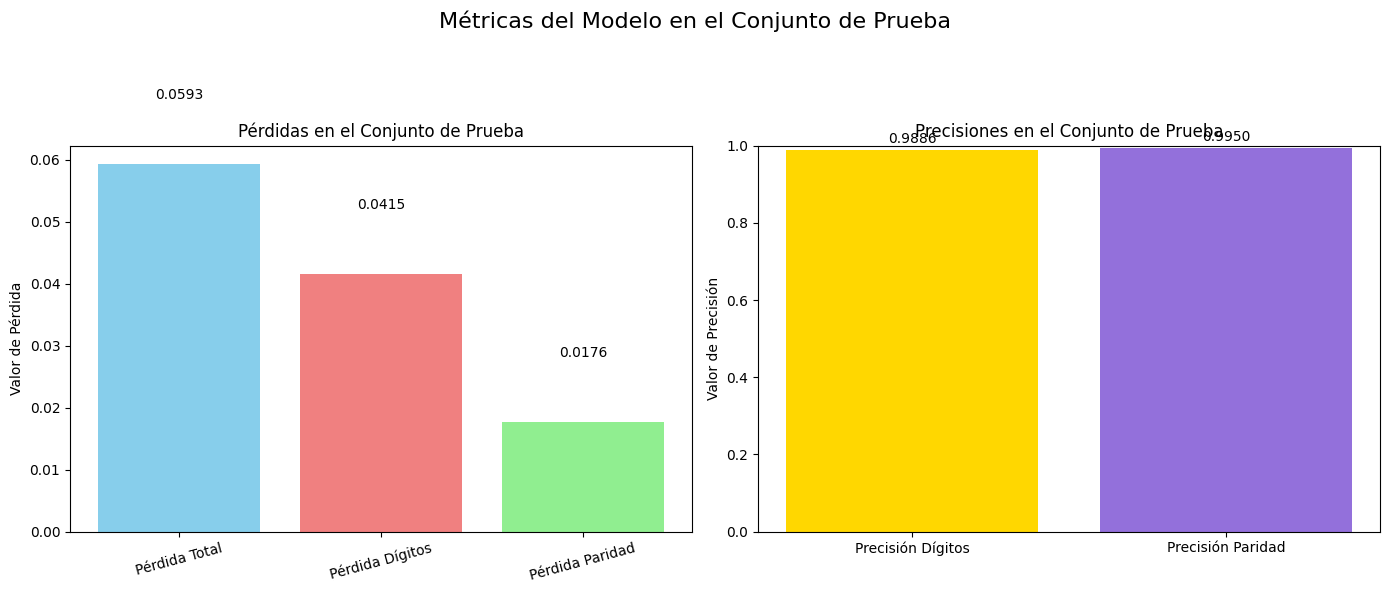

In [ ]:
# Extraer las métricas para graficar
test_loss_total = results[0]
test_loss_digit = results[1]
test_loss_parity = results[2]
test_accuracy_digit = results[3]
test_accuracy_parity = results[4]


# Datos para el gráfico de pérdidas
loss_labels = ['Pérdida Total', 'Pérdida Dígitos', 'Pérdida Paridad']
loss_values = [test_loss_total, test_loss_digit, test_loss_parity]

# Datos para el gráfico de precisiones
accuracy_labels = ['Precisión Dígitos', 'Precisión Paridad']
accuracy_values = [test_accuracy_digit, test_accuracy_parity]

# --- Crear los gráficos ---

fig, axs = plt.subplots(1, 2, figsize=(14, 6)) # Una fila, dos columnas para los gráficos
fig.suptitle('Métricas del Modelo en el Conjunto de Prueba', fontsize=16)

# Gráfico de Pérdidas
axs[0].bar(loss_labels, loss_values, color=['skyblue', 'lightcoral', 'lightgreen'])
axs[0].set_title('Pérdidas en el Conjunto de Prueba')
axs[0].set_ylabel('Valor de Pérdida')
axs[0].tick_params(axis='x', rotation=15) # Rotar etiquetas para mejor legibilidad
for i, v in enumerate(loss_values):
    axs[0].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom') # Añadir valores encima de las barras

# Gráfico de Precisiones
axs[1].bar(accuracy_labels, accuracy_values, color=['gold', 'mediumpurple'])
axs[1].set_title('Precisiones en el Conjunto de Prueba')
axs[1].set_ylabel('Valor de Precisión')
axs[1].set_ylim(0, 1) # La precisión va de 0 a 1
for i, v in enumerate(accuracy_values):
    axs[1].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom') # Añadir valores encima de las barras

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Ajustar el layout para el título principal
plt.show()